In [1]:
%matplotlib inline
import numpy as np
import tick
import tick.hawkes as hk
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from multiprocessing import Pool
from time import time
import scipy.stats as ss
import os
from matplotlib.patches import Rectangle

import sys
sys.path.append("../granger-busca")
from gb import simulate, GrangerBusca
sys.path.append("../framework")
from pp_metrics import *
import aux_funcs
import seaborn as sns


### Example realization of PP

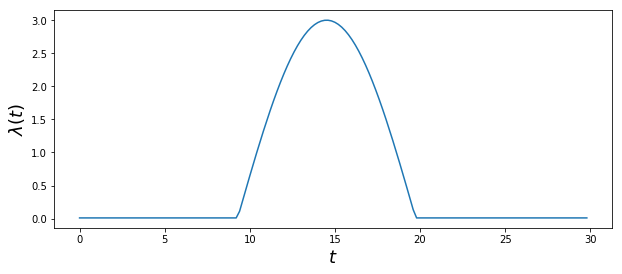

Text(0.5, 1.0, 'Realization of a point process')

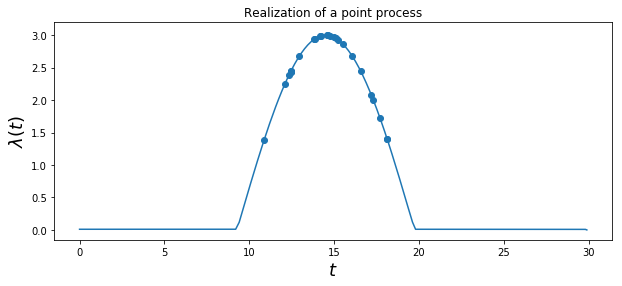

In [72]:
from tick.base import TimeFunction

from tick.plot import plot_point_process
from tick.hawkes import SimuInhomogeneousPoisson
run_time = 30

T = np.arange((run_time ) * 5, dtype=float) / 5
Y = np.array([max(0.01,3*np.sin(i*0.3+3.5)) for i in T])
plt.figure(figsize=(10,4))
plt.ylabel("$\lambda(t)$", fontsize=18)
plt.xlabel("$t$", fontsize=18)
plt.plot(T,Y)
plt.show()


tf = TimeFunction((T, Y), dt=0.001)
in_poi = SimuInhomogeneousPoisson([tf], end_time=run_time, verbose=False)
in_poi.track_intensity(0.1)
in_poi.simulate()
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
plot_point_process(in_poi,ax=ax)
ax.set_ylabel("$\lambda(t)$", fontsize=18)
ax.set_title("Realization of a point process")


### Lines with events

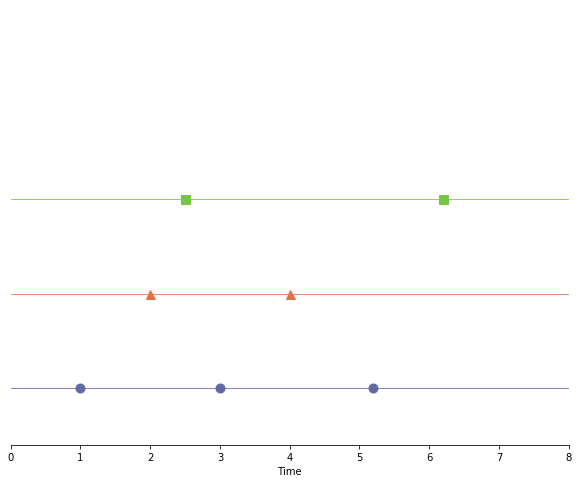

In [164]:
timestamps=[[1.,3.,5.2],[2.,4.],[2.5,6.2]]

plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)

colors=['#626AA6','#E37247','#74C740']
markers=['o','^','s']
for i in range(len(timestamps)):
    x=timestamps[i]
    y=[i*0.5 for value in x]
    plt.plot(timestamps[i],y, markers[i],color=colors[i],markersize=9)
    plt.axhline(y=i*0.5,color=colors[i],linewidth=0.8)

plt.xlim(0.0,8.0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.ylim(-0.3,2)
plt.yticks([])
plt.xlabel("Time")
plt.show()

### Cluster process visualization

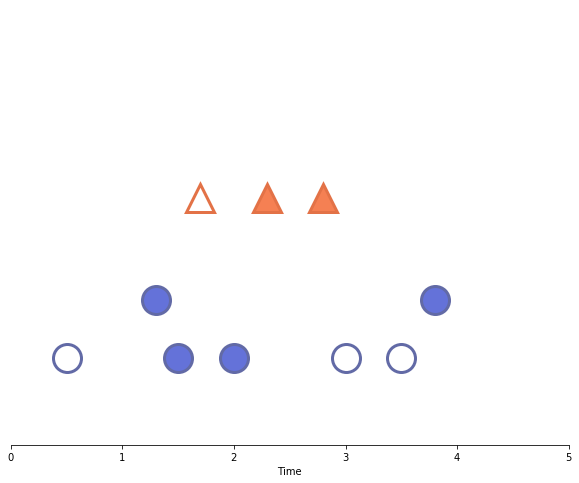

In [20]:
timestamps=[[0.5,1.5,2,3,3.5],[1.3,3.8],[1.7,2.3,2.8]]

colored = [1.5,1.3,2,3.8,2.3,2.8]
height = [0,0.2,0.55]
plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)

colors = ['#626AA6','#626AA6','#E37247']
facecolors = ['#6472d9','#6472d9','#f58053']
markers=['o','o','^']
for i in range(len(timestamps)):
    for t in timestamps[i]:
        facecolor = 'w'
        if t in colored:
            facecolor = facecolors[i]
        plt.plot(t,height[i],markers[i],markerfacecolor=facecolor,markeredgecolor=colors[i],markeredgewidth=3,markersize=28)
    #plt.axhline(y=i*0.5,color=colors[i],linewidth=0.8)

plt.xlim(0.0,5.0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.ylim(-0.3,1.2)
plt.yticks([])
plt.xlabel("Time")
plt.savefig('cluster_process')

### Plot realization of BuSca process

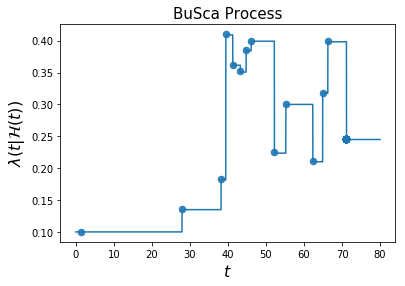

In [7]:

def plot_gb(timestamps, mu, alpha, beta, tmax):
    intensity = mu
    intensities = []
    t_idx = 0
    event = timestamps[t_idx]
    plt.plot(timestamps[0],intensity,'o', color = "#1F77B4", markersize = 6.5, alpha=0.9)
    for t in np.arange(0,tmax,0.01):
        if t > event:
            
            if t_idx > 0:
                delta_t = timestamps[t_idx] - timestamps[t_idx-1]
                intensity = mu + alpha/(beta+delta_t)
                plt.plot(timestamps[t_idx]+1e-2,intensity+1e-3,'o', color = "#1F77B4", markersize = 6.5, alpha=0.9)
            if t_idx+1 < len(timestamps):
                t_idx += 1
                event = timestamps[t_idx]
        intensities.append(intensity)
    plt.plot(np.arange(0,tmax,0.01), intensities,'-', color = "#1F77B4")
    plt.xlabel(r'$t$', size = 16)
    plt.ylabel(r'$\lambda(t|\mathcal{H}(t))$', size = 16)
    plt.title('BuSca Process', size = 15)
    plt.show()
    
d = 1
mu = 0.1
beta = 2
Mu = np.ones((d,1)) * mu
Alpha = np.ones((d,d)) / d
Beta = np.ones((d,d)) * beta

simulation_time = 80
sim = simulate.GrangeBuscaSimulator(mu_rates = Mu, Alpha_ba = Alpha)
timestamps = sim.simulate(simulation_time)
plot_gb(timestamps[0], mu, 1, beta, tmax=simulation_time)
    

### Counting function

(0, 8)

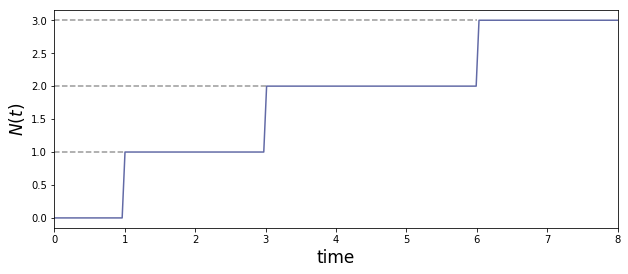

In [33]:
plt.figure(1, figsize=(10.1, 4))
times = [1,3,6]
y = np.linspace(0,0,200)
x = np.linspace(0,8,200)
i=1
for t in times:
    y += [0 if x[i] < t else 1 for i in range(len(x))]
    plt.hlines(y=i,xmin=0,xmax=t,linestyle='--',color='k', alpha=0.4)
    i += 1
plt.plot(x,y,'-',color = '#626AA6')
plt.ylabel(r'$N(t)$',fontsize=17)
plt.xlabel('time',fontsize=17)
plt.xlim(0,8)

### Hawkes Intensity function

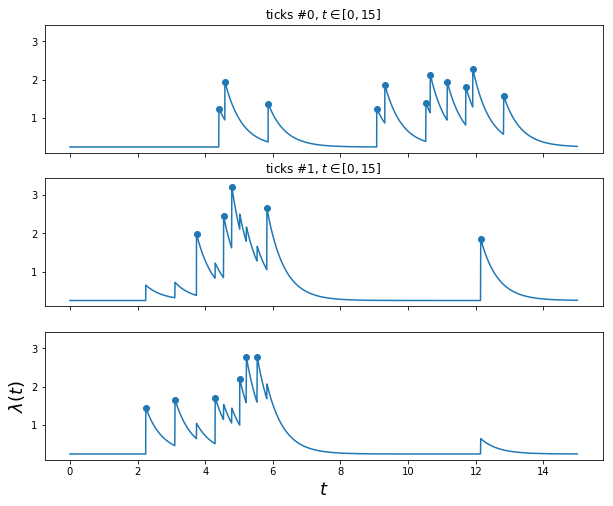

In [201]:
from tick.base import TimeFunction

from tick.plot import plot_point_process
from tick.hawkes import SimuHawkesExpKernels


n_nodes = 3
adjacency = np.array([[0.5,0,0],[0,0.8,0.2],[0,0.2,0.6]])
#adjacency[0, 1] = 0
decays = 2 * np.ones((n_nodes, n_nodes))
baseline = 0.25 * np.ones(n_nodes)
hawkes = SimuHawkesExpKernels(adjacency=adjacency, decays=decays,
                              baseline=baseline, verbose=False)

run_time = 15
hawkes.end_time = run_time
dt = 0.01
hawkes.track_intensity(dt)
hawkes.simulate()

fig, ax = plt.subplots(n_nodes, 1, figsize=(10, 8), sharex=True, sharey=True)
plot_point_process(hawkes, n_points=50000, t_min=0, ax=ax)
plt.title("")
plt.ylabel("$\lambda(t)$", fontsize=18)
plt.xlabel("$t$", fontsize=18)
#plt.xlim(2,4)
#plt.ylim(0.35,0.6)
plt.show()

### Hawkes intensity function decomposed

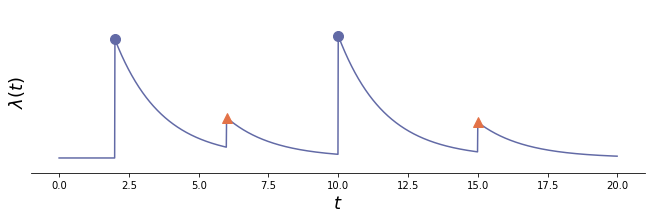

In [202]:
def intensity(t,points):
    lambda_t = mu
    for p in range(len(points)):
        for time in points[p]:
            if(time > t):
                break
            lambda_t += alpha[p]*np.exp(-beta*(t-time))
    return lambda_t

plt.figure(1, figsize=(11, 3))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([])

T = 20
dt = 0.01

mu = 0.2
alpha = [0.4,0.1]
beta = 0.6

points = [[2,10],[6,15]]
#points = []
x = np.arange(0,T,dt)
y = [intensity(i, points) for i in x]

colors = ['#626AA6','#E37247','#74C740']
markers = ['o','^','s']
plt.ylim(0.15,0.7)
plt.plot(x,y,colors[0])

for p in range(len(points)):
    for time in points[p]:
        plt.plot(time,y[int(time/dt)],marker=markers[p],color=colors[p], markersize=10)


plt.ylabel("$\lambda(t)$", fontsize=18)
plt.xlabel("$t$", fontsize=18)
plt.show()


### Wold intensity function decomposed

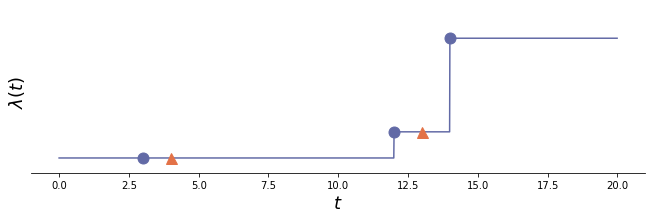

In [215]:


def intensity(t,points):
    lambda_t = mu
    
    last_event = 0
    for time in points[0]:
        if time > t:
            break
        last_event = time
    
    for p in range(len(points)):
        last_other_event = 0
        for time in points[p]:
            if last_event <= time:
                break
            last_other_event = time
        
        if (last_event>0) and (last_other_event>0):
            delta_t = last_event - last_other_event
            lambda_t += alpha[p]/(beta+delta_t)
            
    return lambda_t

plt.figure(1, figsize=(11, 3))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([])

T = 20
dt = 0.01

mu = 0.2
alpha = [0.4,0.4]
beta = 0.6

points = [[3,12,14],[4,13]]
#points = []
x = np.arange(0,T,dt)
y = [intensity(i, points) for i in x]

colors = ['#626AA6','#E37247','#74C740']
markers = ['o','^','s']
plt.ylim(0.15,0.7)
plt.plot(x,y,colors[0])

for p in range(len(points)):
    for time in points[p]:
        plt.plot(time,y[int(time/dt)],marker=markers[p],color=colors[p], markersize=11)


plt.ylabel("$\lambda(t)$", fontsize=18)
plt.xlabel("$t$", fontsize=18)
plt.show()

### Hawkes Inference

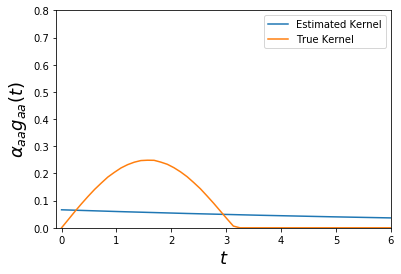

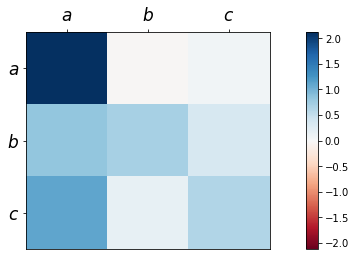

In [64]:

from tick.hawkes import (SimuHawkes, HawkesKernelTimeFunc, HawkesKernelExp,
                         HawkesEM)
from tick.base import TimeFunction
from tick.plot import plot_hawkes_kernels, plot_hawkes_kernel_norms

run_time = 30000

t_values2 = np.linspace(0, 4, 20)
y_values2 = np.maximum(0., np.sin(t_values2) / 4)
tf2 = TimeFunction([t_values2, y_values2])
kernel2 = HawkesKernelTimeFunc(tf2) ###esse aqui

baseline = np.array([0.1])

hawkes = SimuHawkes(kernels=[[kernel2]],baseline=baseline, end_time=run_time, verbose=False)

hawkes.simulate()

#model = hk.HawkesSumGaussians(max_mean_gaussian=4,n_gaussians=6,verbose=False, tol=1e-3)
#model = hk.HawkesEM(kernel_support=6,kernel_size=20,verbose=False, tol=1e-3)
model = hk.HawkesADM4(decay=0.1,verbose=False, tol=1e-3)
model.fit(hawkes.timestamps)


fig = plot_hawkes_kernels(model, hawkes=hawkes, show=False)
plt.legend(labels=["Estimated Kernel", "True Kernel"])
plt.xlim(-0.1,6)
for ax in fig.axes:
    ax.set_ylim([0, 0.8])
    #ax.get_lines()[0].set_alpha(0)

plt.ylabel(r'$\alpha_{aa}g_{aa}(t)$')
plt.show()

n_nodes = 3
adjacency = np.array([[0.5,0,0],[0,0.8,0.2],[0,0.2,0.6]])
decays = 2 * np.ones((n_nodes, n_nodes))
baseline = 0.25 * np.ones(n_nodes)
hawkes = hk.SimuHawkesExpKernels(adjacency=adjacency, decays=decays,end_time=run_time,
                              baseline=baseline, verbose=False)
hawkes.simulate()
model = hk.HawkesCumulantMatching(integration_support=10)
model.fit(hawkes.timestamps)
fig = plot_hawkes_kernel_norms(model, show=False)
fig.axes[0].set_xticklabels(['$a$','$b$','$c$'])
fig.axes[0].set_yticklabels(['$a$','$b$','$c$'])

plt.show()

### Violin plot for gini in different datasets

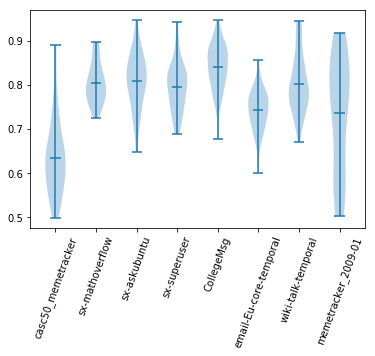

In [17]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

file_list = ["casc50_memetracker","sx-mathoverflow", "sx-askubuntu", "sx-superuser", "CollegeMsg", "email-Eu-core-temporal", "wiki-talk-temporal","memetracker_2009-01"]
j = 0
d = []
for file in file_list:
    deltas = get_deltas(timestamps[file])
    Y = []
    X = []
    for i in range(len(deltas)):
        X.append(gini(deltas[i]))
        Y.append(j)
        #Y.append(gini(deltas[i]))
        #X.append(len(timestamps[file][i]))
    j += 1
    x = np.mean(X)
    y = np.mean(Y)
    ystd = np.var(Y)
    d.append(X)
    #plt.plot(X,Y,'o',alpha=0.3,markersize=7,label=file)
    #plt.errorbar(x,y,yerr=ystd)
    #plt.legend(loc='center right',  bbox_to_anchor=(1.2, 0.2, 0.5, 0.5), fontsize = 'large')
plt.violinplot(d, points = 200, showmeans = True)
plt.xticks(range(1,len(file_list)+1), file_list, rotation=70)
#plt.xscale('log')
plt.show()
